In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#df=pd.read_csv("C:\\Users\\Dell\\Downloads\\Life Expectancy Data.csv")

In [4]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_2cc0cc4b8ede412abaa280603ec24901 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='5upb4gVSOCDtneYgkgrop8miiTnF7SLvghrKnQWbxP2_',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_2cc0cc4b8ede412abaa280603ec24901.get_object(Bucket='lifeexp-donotdelete-pr-hungekmlyx4k2m',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [6]:
df.dropna(inplace=True)
df['Life expectancy ']=df['Life expectancy '].astype(int,copy=True)


In [7]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,68.907216,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.826497,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.000000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.000000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


In [8]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

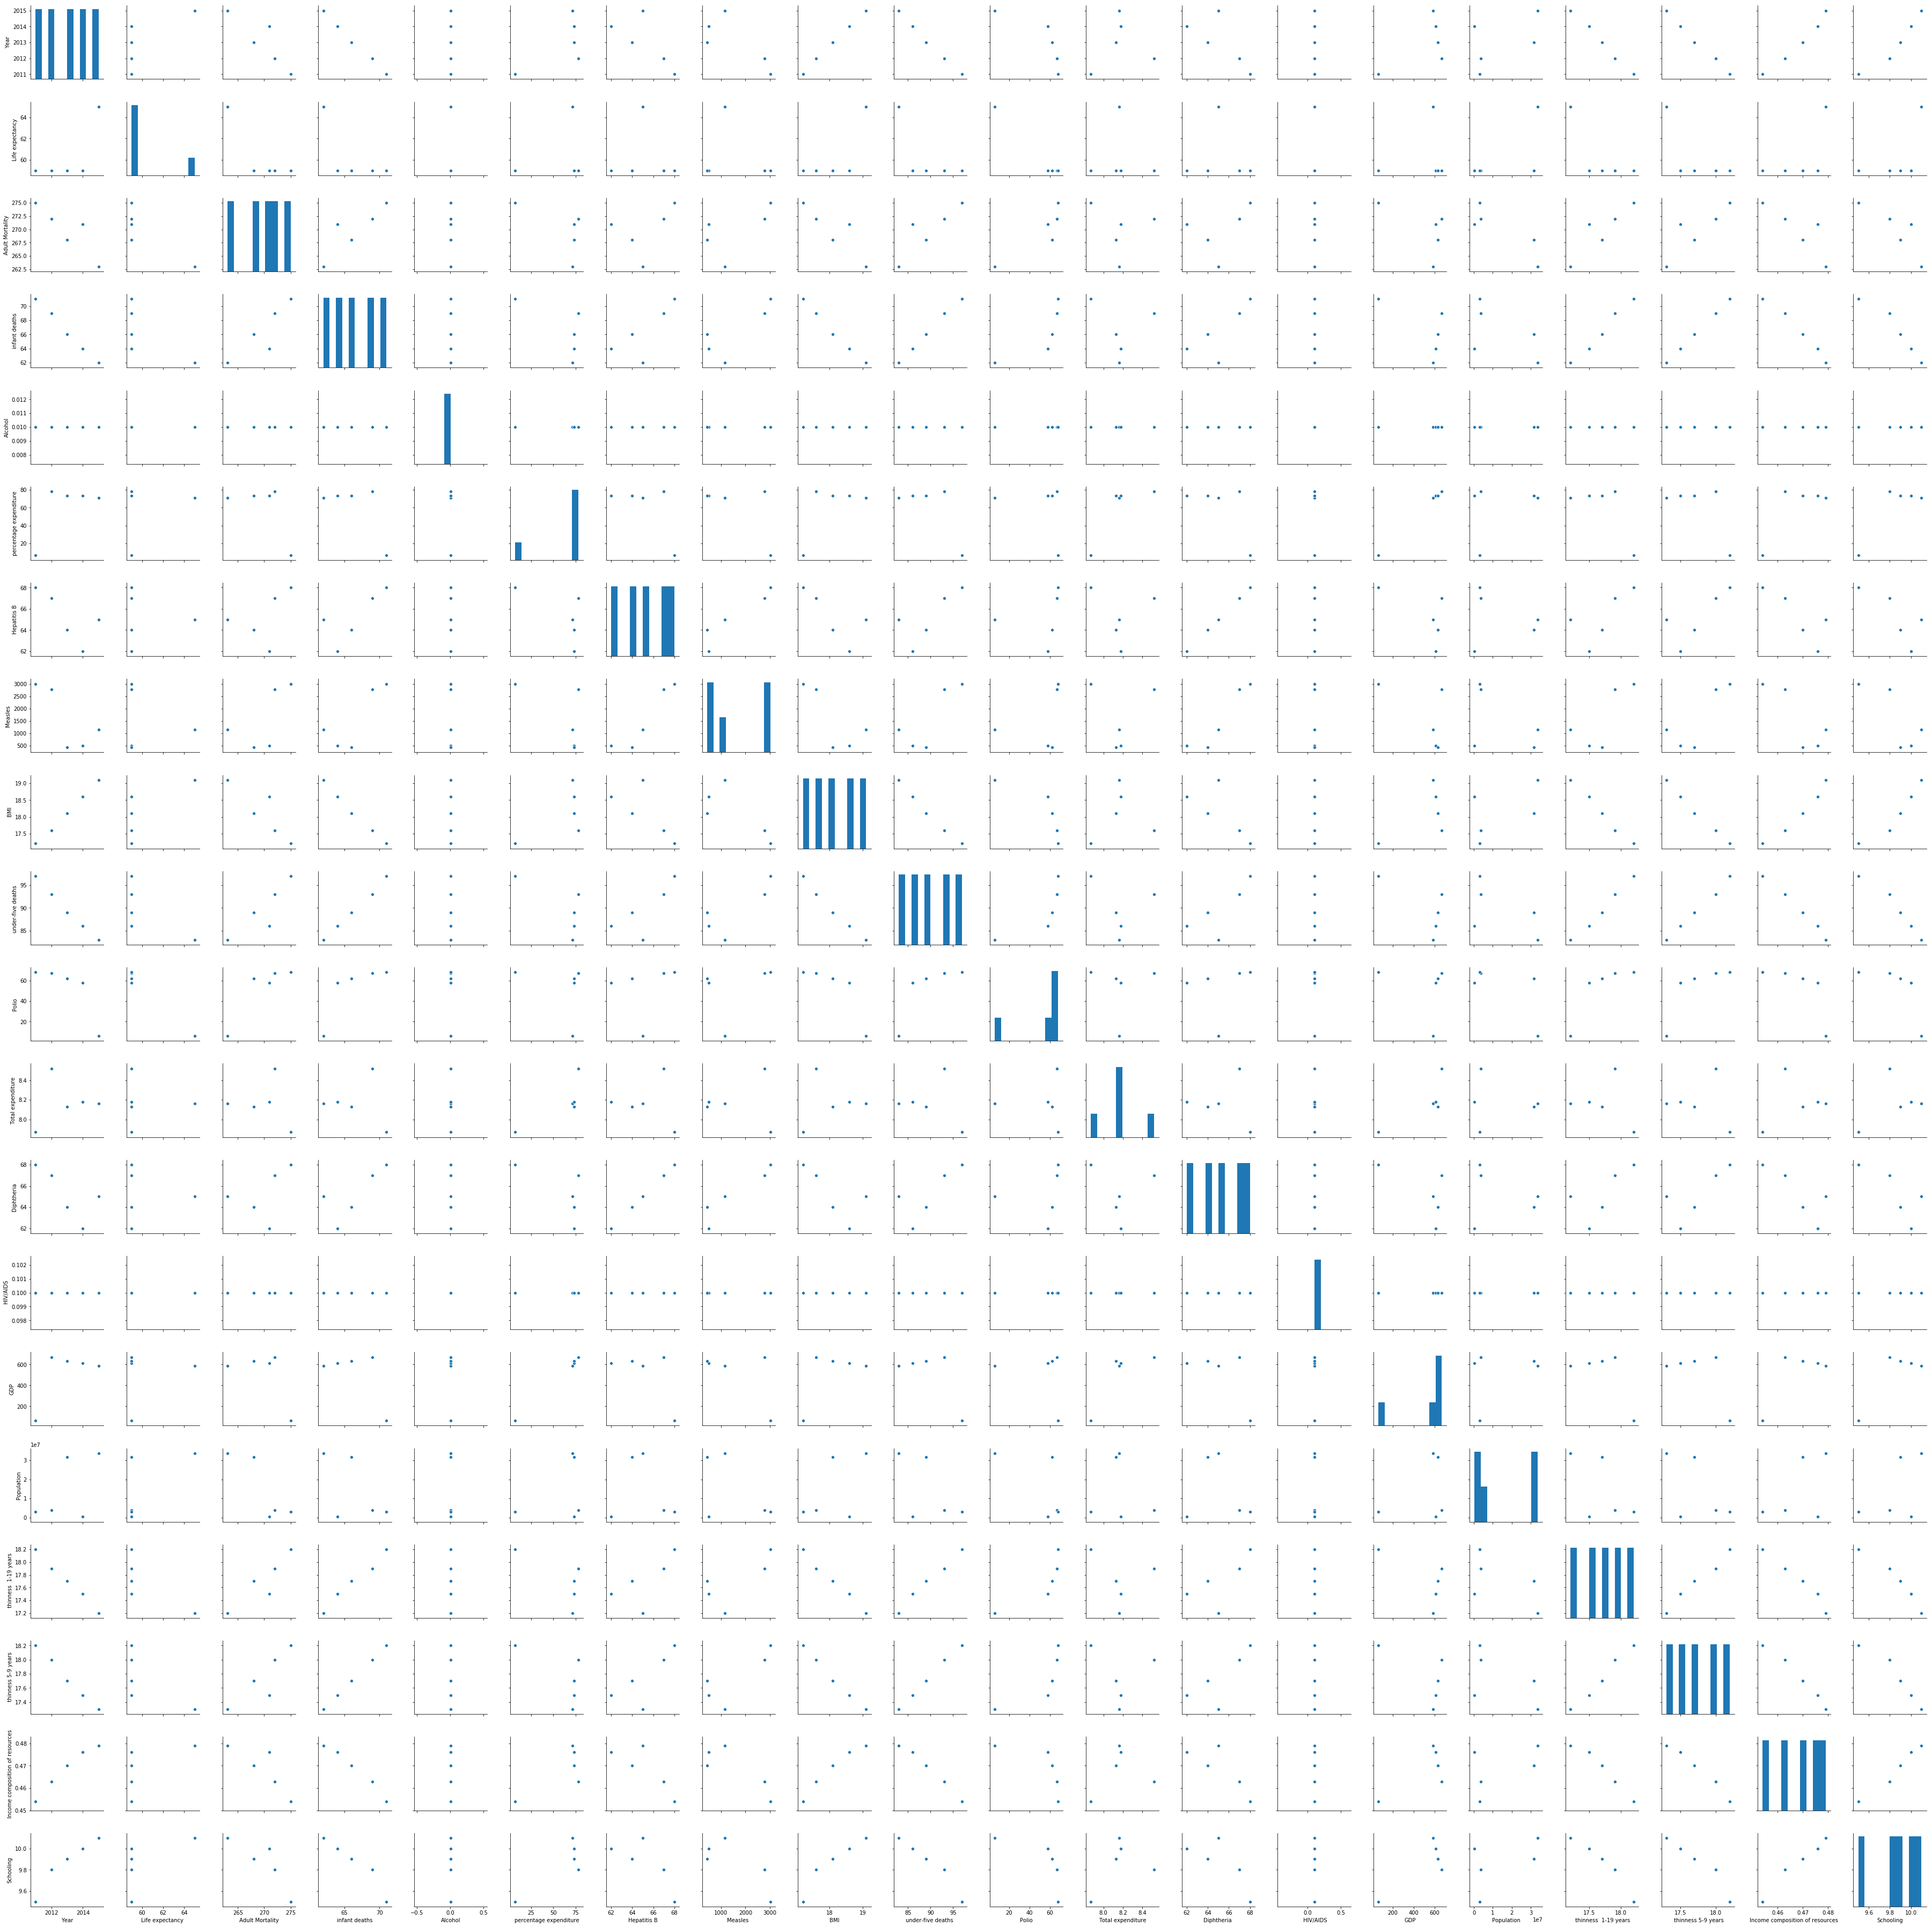

In [9]:
sns.pairplot(df.head())

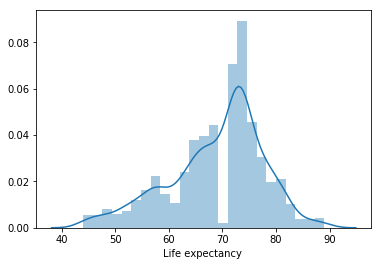

In [10]:
sns.distplot(df['Life expectancy '])

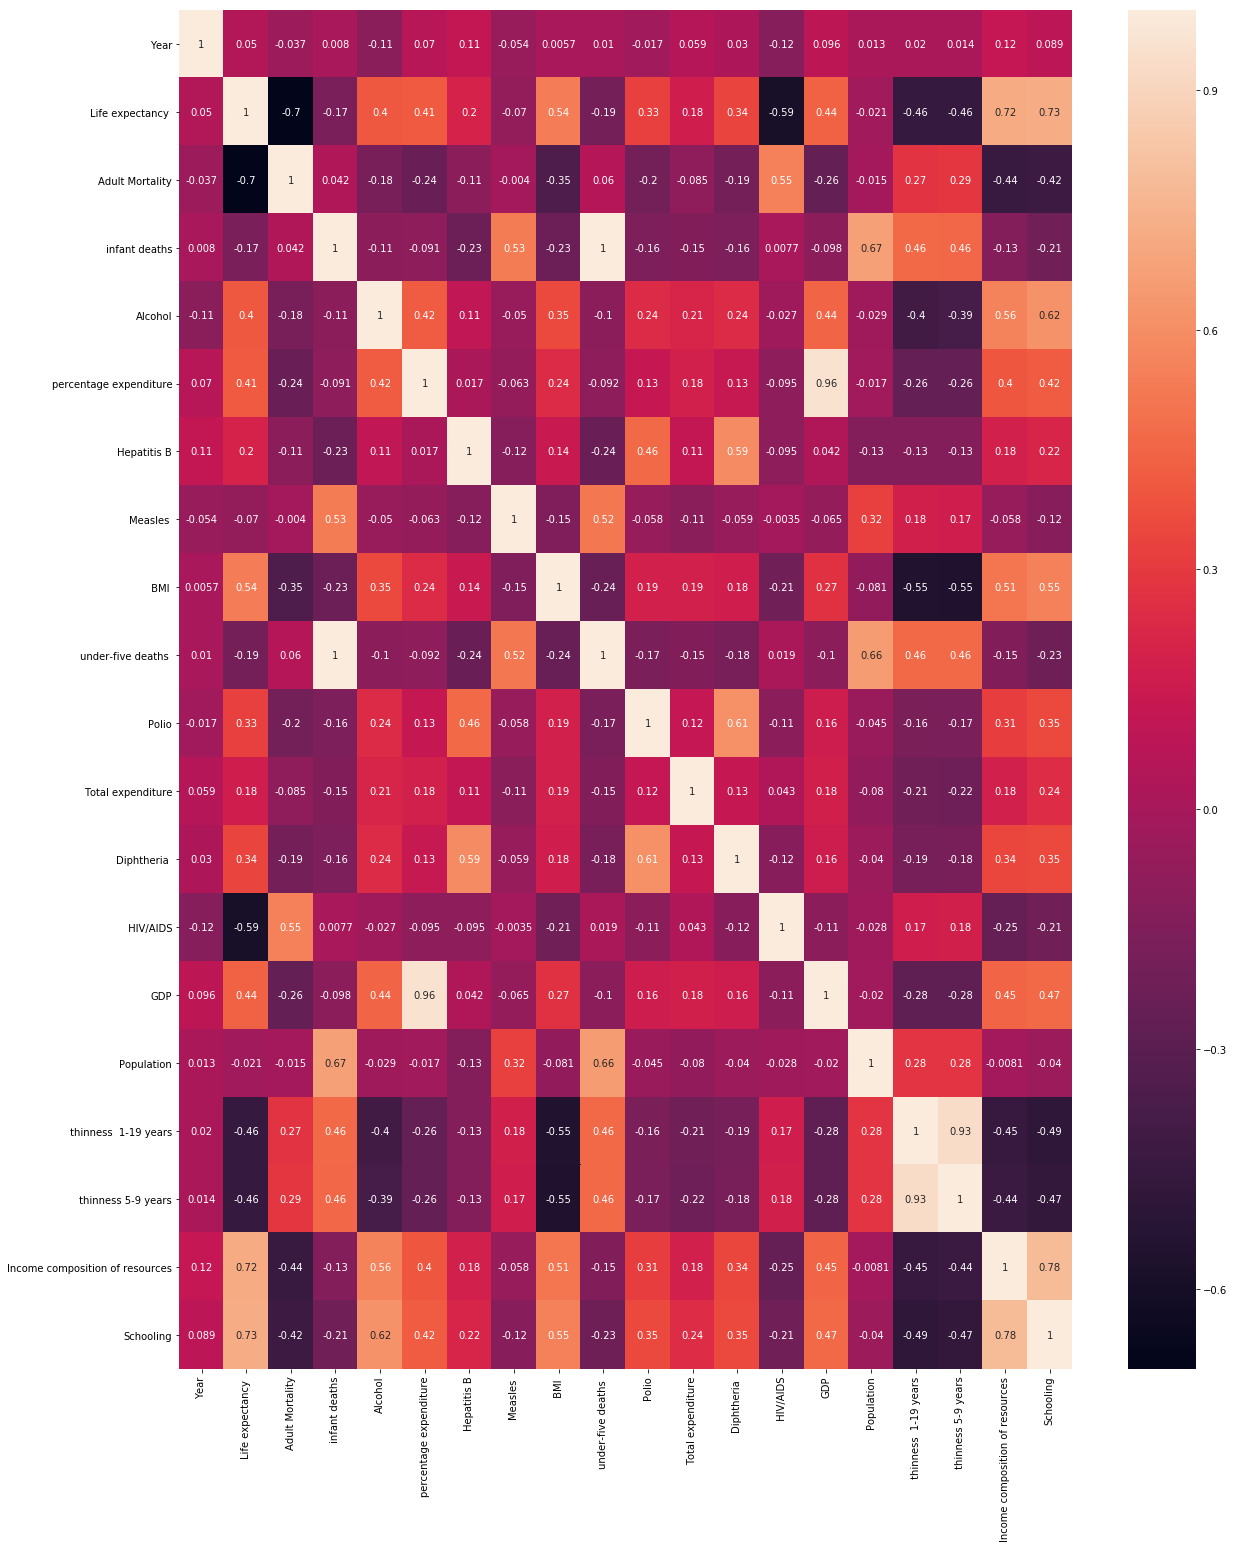

In [11]:
plt.figure(figsize=(20,25))
sns.heatmap(df.corr(),annot=True)

In [12]:
X=df[['Year', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS',' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']]

In [13]:
y=df['Life expectancy ']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lm = LinearRegression()

lm.fit()

In [18]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
lm.coef_

array([-1.18429124e-01, -1.75637076e-02,  6.68131752e-02, -9.64769081e-02,
        5.18419883e-04,  2.30081417e-04, -1.26690703e-05,  3.34220903e-02,
       -5.01602253e-02,  8.05702533e-03,  1.54414472e-01,  1.44988909e-02,
       -4.79034302e-01, -6.57594716e-02,  4.34258505e-03,  8.76523351e+00,
        8.95368754e-01])

In [20]:
pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

,Coeff
Year,-0.118429
Adult Mortality,-0.017564
infant deaths,0.066813
Alcohol,-0.096477
percentage expenditure,0.000518
Hepatitis B,0.000230
Measles,-0.000013
BMI,0.033422
under-five deaths,-0.050160
Polio,0.008057


In [21]:
predict=lm.predict(X_test)

In [22]:
predict

array([74.73564083, 73.40917096, 73.16631271, 65.26824934, 67.27218406,
       82.83972474, 71.82212674, 58.52964309, 62.63768265, 60.94509232,
       71.31052105, 71.60825068, 75.92552371, 58.31180764, 78.94531382,
       59.47311536, 72.4285241 , 56.76523205, 71.85456348, 58.66344454,
       70.76275676, 52.67748264, 59.88002053, 73.60159279, 70.02100871,
       74.79813192, 62.60091157, 66.18723403, 70.94459119, 77.3598833 ,
       77.95635999, 62.158897  , 71.81067962, 74.21168796, 76.06569206,
       73.97803879, 77.98886174, 69.56850199, 69.93987241, 75.78287424,
       80.7817618 , 55.62759743, 76.84726328, 73.21035018, 67.03260786,
       73.976545  , 61.40743945, 72.97406407, 71.61436927, 67.0032085 ,
       73.61380344, 69.31533163, 60.82361519, 62.74886459, 71.80444171,
       62.41533637, 51.02471766, 63.3691883 , 57.74366874, 61.08307616,
       62.10199713, 77.17052538, 69.24388987, 72.90771043, 70.46360124,
       77.01606152, 70.63494701, 52.75407027, 70.6345422 , 76.10

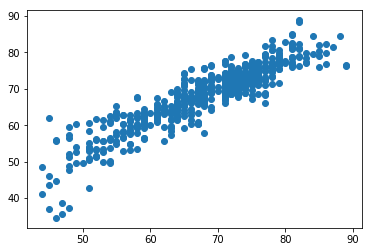

In [23]:
plt.scatter(y_test,predict)

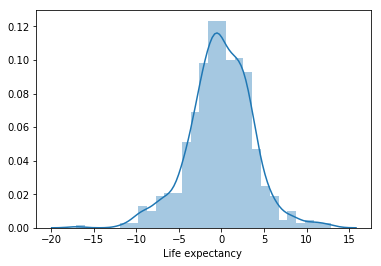

In [24]:
sns.distplot(y_test-predict)

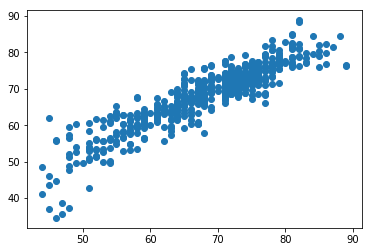

In [25]:
plt.scatter(y_test,predict)

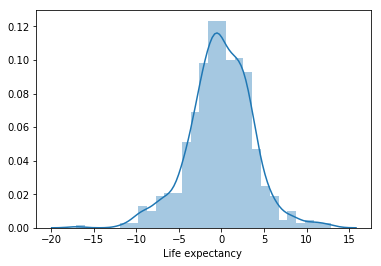

In [26]:
sns.distplot(y_test-predict)

In [27]:
!pip install watson-machine-learning-client

In [28]:
wml_credentials={
  "apikey": "ulC-LylQb6uYnMs35C-PVOIT7jy4dODCKpXY2V4bzCZ0",
  "instance_id": "9a314e66-0858-4938-8a51-45572e60296f",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [29]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient
client = WatsonMachineLearningAPIClient( wml_credentials )

2020-06-15 19:43:28,233 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [30]:
model_props= {client.repository.ModelMetaNames.AUTHOR_NAME : "Prem",
             client.repository.ModelMetaNames.AUTHOR_EMAIL : "prempatel8108@gmail.com",
             client.repository.ModelMetaNames.NAME : "LifeExpectancy"}

In [31]:
model_artifact = client.repository.store_model(lm, meta_props=model_props)
published_model_uid = client.repository.get_model_uid(model_artifact)

In [32]:
published_model_uid

'2c21278c-06d1-4830-a9c2-3b09175abe60'

In [33]:
client.deployments.list()

------------------------------------  ---------------  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME             TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
cefe1e9c-84c9-4a02-9fc7-63cfd4d2d611  Life-Expectancy  online  DEPLOY_SUCCESS  2020-06-15T17:59:50.244Z  scikit-learn-0.20  model
------------------------------------  ---------------  ------  --------------  ------------------------  -----------------  -------------


In [34]:
#scoring_endpoints = client.deployments.get_scoring_url(deployment)

In [35]:
deployment= client.deployments.create(published_model_uid, name='Life-Expectancy')



#######################################################################################

Synchronous deployment creation for uid: '2c21278c-06d1-4830-a9c2-3b09175abe60' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='de27e85a-ee07-4480-a498-f3e53e3626b6'
------------------------------------------------------------------------------------------------




In [36]:
scoring_endpoints = client.deployments.get_scoring_url(deployment)

In [37]:
scoring_endpoints

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/9a314e66-0858-4938-8a51-45572e60296f/deployments/de27e85a-ee07-4480-a498-f3e53e3626b6/online'